# Análisis de datos - Modelo Scotogénico

Este notebook contiene todos los análisis y gráficas del modelo.

## 1. Importar librerías y cargar datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'


In [3]:
# Cargar datos
data = pd.read_csv('/home/js.sanchezl1/Proyecto_Teorico/template5.csv', sep=';')

## 2. Extraer variables principales

In [4]:
# Masas
m_etaI = data["MASS etI"]
m_N1 = data["MNIN Mn(1,1)"]

# Densidad de reliquia
relic_density = data["MICROMEGAS Omega h^2 (Dark matter relic density)"]

# Acoplamientos lambda
lambda1 = np.array(data["MINPAR lambda1Input"])
lambda2 = np.array(data["MINPAR lambda2Input"])
lambda3 = np.array(data["MINPAR lambda3Input"])
lambda4 = np.array(data["MINPAR lambda4Input"])
lambda5 = np.array(data["MINPAR lambda5Input"])

## 3. Calcular acoplamientos de Yukawa

In [5]:
# Extraer los acoplamientos de Yukawa (parte real e imaginaria)
yukawa_labels = [
    ("YNIN Yn(1,1)", "IMYNIN Yn(1,1)"),
    ("YNIN Yn(1,2)", "IMYNIN Yn(1,2)"),
    ("YNIN Yn(1,3)", "IMYNIN Yn(1,3)"),
    ("YNIN Yn(2,1)", "IMYNIN Yn(2,1)"),
    ("YNIN Yn(2,2)", "IMYNIN Yn(2,2)"),
    ("YNIN Yn(2,3)", "IMYNIN Yn(2,3)"),
    ("YNIN Yn(3,1)", "IMYNIN Yn(3,1)"),
    ("YNIN Yn(3,2)", "IMYNIN Yn(3,2)"),
    ("YNIN Yn(3,3)", "IMYNIN Yn(3,3)")
]

# Calcular la norma de cada elemento de Yukawa
yukawa_norms = []
for re_label, im_label in yukawa_labels:
    re_part = np.array(data[re_label])
    im_part = np.array(data[im_label])
    norm = np.sqrt(re_part**2 + im_part**2)
    yukawa_norms.append(norm)

# Convertir a array numpy (shape: 9 x N_points)
yukawa_norms = np.array(yukawa_norms)

# Calcular la media geométrica de la norma de los Yukawa para cada punto
geometric_mean_yukawa = np.prod(yukawa_norms, axis=0)**(1.0/len(yukawa_labels))

# Filtrar valores finitos
mask = np.isfinite(relic_density) & np.isfinite(m_etaI) & np.isfinite(m_N1) & np.isfinite(geometric_mean_yukawa) & (geometric_mean_yukawa > 0)

## 4a. Gráfica: Densidad de reliquia vs masa η_I

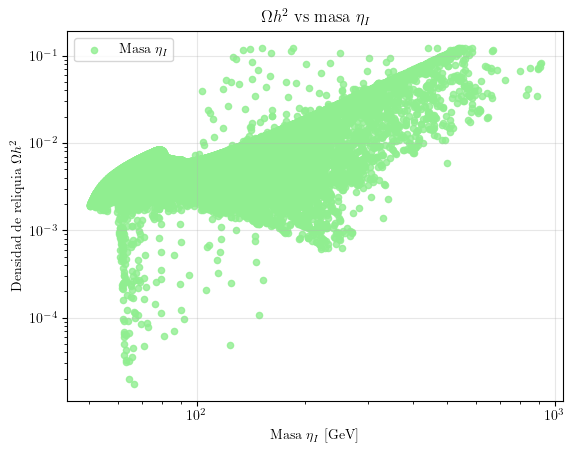

In [6]:
# Crear carpeta Constraint2 si no existe
os.makedirs("/home/js.sanchezl1/Proyecto_Teorico/Constraint5", exist_ok=True)

plt.figure()
plt.scatter(m_etaI[mask], relic_density[mask], s=20, alpha=0.8, marker='o', label=r"Masa $\eta_I$", color="lightgreen")
plt.xlabel(r"Masa $\eta_I$ [GeV]")
plt.ylabel(r"Densidad de reliquia $\Omega h^2$")
plt.title(r"$\Omega h^2$ vs masa $\eta_I$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.savefig("/home/js.sanchezl1/Proyecto_Teorico/Constraint5/scatter_omega_vs_etaI.png", dpi=300, bbox_inches="tight")
plt.show()


## 4b. Gráfica: Densidad de reliquia vs masa N1

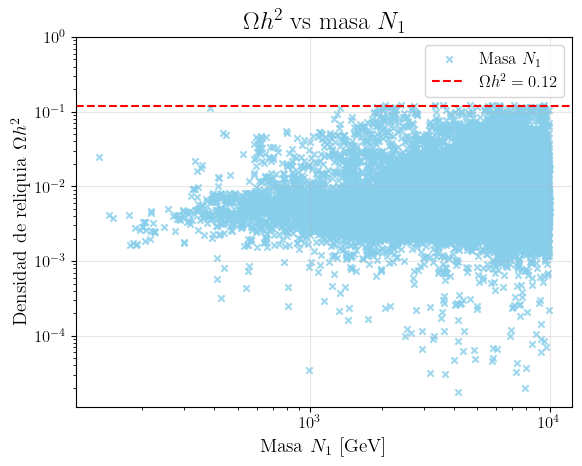

In [7]:
plt.figure()
plt.rcParams.update({
    "axes.titlesize": 18,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})
plt.scatter(m_N1[mask], relic_density[mask], s=20, alpha=0.8, marker='x', label=r"Masa $N_1$", color="skyblue")
plt.xlabel(r"Masa $N_1$ [GeV]")
plt.ylabel(r"Densidad de reliquia $\Omega h^2$")
plt.title(r"$\Omega h^2$ vs masa $N_1$")
plt.axhline(y=0.12, color='red', linestyle='--', linewidth=1.5,
            label=r'$\Omega h^2 = 0.12$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.ylim(top=1e0)
plt.savefig("/home/js.sanchezl1/Proyecto_Teorico/Constraint5/scatter_omega_vs_N1.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
relic_density = data["MICROMEGAS Omega h^2 (Dark matter relic density)"]

# Definir límites
upper_limit = 0.12 + 0.012
lower_limit = 0.12 - 0.012

# Contar puntos
n_above = (relic_density > upper_limit).sum()
n_below = (relic_density < lower_limit).sum()
n_inside = ((relic_density >= lower_limit) & (relic_density <= upper_limit)).sum()

print(f"Puntos por encima de 0.132: {n_above}")
print(f"Puntos por debajo de 0.108: {n_below}")
print(f"Puntos dentro del rango (0.108–0.132): {n_inside}")
print(f"Total de puntos: {len(relic_density)}")

## 4c. Histograma: Distribución de densidad de reliquia

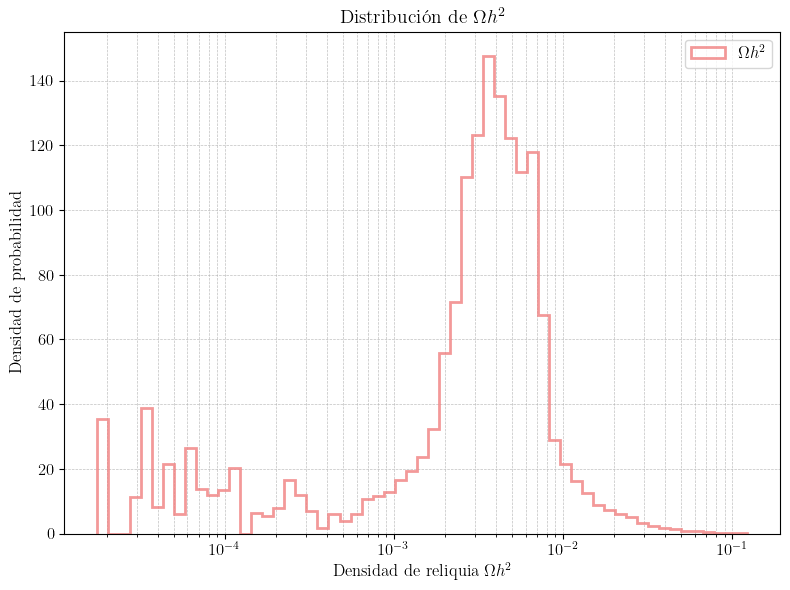

In [8]:
data = relic_density[mask]
data = data[np.isfinite(data) & (data > 0)]

# --- Bins logarítmicos (clave para que se vea bien) ---
nbins = 60
bins = np.logspace(np.log10(data.min()), np.log10(data.max()), nbins)

plt.figure(figsize=(8, 6))

# --- Histograma normalizado y visualmente limpio ---
plt.hist(
    data,
    bins=bins,
    density=True,
    histtype='step',  
    color='lightcoral',
    alpha=0.8,
    linewidth=2,
    label=r"$\Omega h^2$"
)

# --- Estética ---
plt.xscale('log')
plt.xlabel(r"Densidad de reliquia $\Omega h^2$", fontsize=12)
plt.ylabel("Densidad de probabilidad", fontsize=12)
plt.title(r"Distribución de $\Omega h^2$", fontsize=14)
plt.grid(True, which='both', ls='--', lw=0.5, alpha=0.8)
plt.legend(frameon=True)
plt.tight_layout()

# --- Guardar ---
plt.savefig(
    "/home/js.sanchezl1/Proyecto_Teorico/Constraint5/hist_relic_density.png",
    dpi=300, bbox_inches="tight"
)
plt.show()

## 5. Histograma: Distribución de λ2, λ3 y λ4

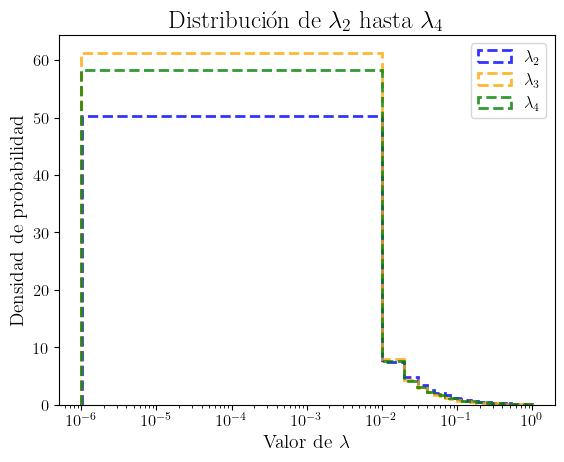

In [9]:
plt.figure()
plt.hist(lambda2, bins=100, alpha=0.8, label=r"$\lambda_2$", color="blue", histtype='step', linewidth=2, density=True, linestyle='--')
plt.hist(lambda3, bins=100, alpha=0.8, label=r"$\lambda_3$", color="orange", histtype='step', linewidth=2, density=True, linestyle='--')
plt.hist(lambda4, bins=100, alpha=0.8, label=r"$\lambda_4$", color="green", histtype='step', linewidth=2, density=True, linestyle='--')
plt.xlabel(r"Valor de $\lambda$")
plt.ylabel("Densidad de probabilidad")
plt.title(r"Distribución de $\lambda_2$ hasta $\lambda_4$")
plt.legend()
plt.xscale('log')
plt.savefig("/home/js.sanchezl1/Proyecto_Teorico/Constraint5/hist_lambdas_2_to_4.png", dpi=300, bbox_inches="tight")
plt.show()


## 6. Histograma: Distribución de λ5

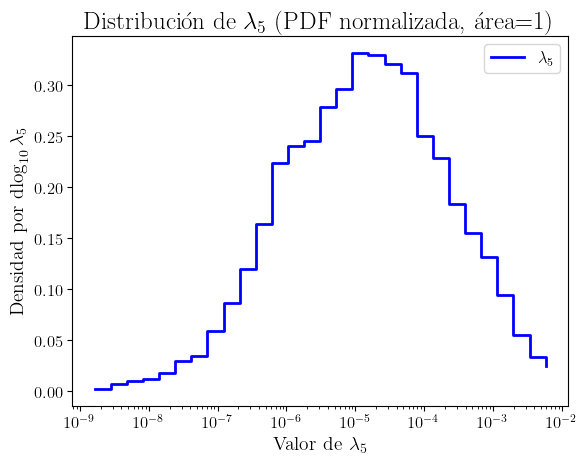

In [10]:
# Filtrar valores positivos y finitos
lambda5_filtered = lambda5[np.isfinite(lambda5) & (lambda5 > 0)]

# Crear bins logarítmicos
nbins = 30
bins_lambda5 = np.logspace(np.log10(lambda5_filtered.min()), np.log10(lambda5_filtered.max()), nbins)

plt.figure()

# --- Ajuste clave para normalización correcta en escala log ---
# Calculamos el histograma manualmente y lo convertimos a PDF en d(log λ)
counts, edges = np.histogram(lambda5_filtered, bins=bins_lambda5)
bin_widths = np.diff(edges)
N = lambda5_filtered.size

# PDF en d(log10 λ5) → dividir por (N * Δlog)
pdf = counts / (N * np.diff(np.log10(edges)))

# Graficar con step
plt.step(edges[:-1], pdf, where='post', linewidth=2, color="blue", label=r"$\lambda_5$")

plt.xscale('log')
plt.xlabel(r"Valor de $\lambda_5$")
plt.ylabel(r"Densidad por d$\log_{10}\lambda_5$")
plt.title(r"Distribución de $\lambda_5$ (PDF normalizada, área=1)")
plt.legend()

plt.savefig("/home/js.sanchezl1/Proyecto_Teorico/Constraint5/hist_lambda5_pdf.png", dpi=300, bbox_inches="tight")
plt.show()


## 7. Histograma: Media geométrica de la norma de los Yukawa

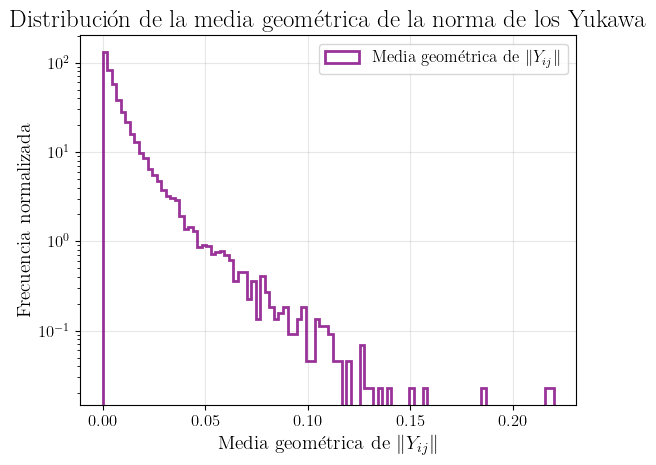

In [11]:
plt.figure()
plt.hist(
    geometric_mean_yukawa[mask],
    bins=100,
    alpha=0.8,
    label=r"Media geométrica de $\|Y_{ij}\|$",
    color="purple",
    density=True,
    histtype='step',
    linewidth=2

)
plt.xlabel(r"Media geométrica de $\|Y_{ij}\|$")
plt.ylabel("Frecuencia normalizada")
plt.title("Distribución de la media geométrica de la norma de los Yukawa")
plt.legend()
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.savefig("/home/js.sanchezl1/Proyecto_Teorico/Constraint5/hist_geometric_mean_yukawa.png", dpi=300, bbox_inches="tight")
plt.show()


## 8. Scatter plots: Comparaciones de acoplamientos de Yukawa

In [12]:
# Crear carpeta para los scatter plots
scatter_dir = "/home/js.sanchezl1/Proyecto_Teorico/Constraint5/scatter_plots_yukawa"
os.makedirs(scatter_dir, exist_ok=True)

yukawa_names = [
    r"$Y_{11}$", r"$Y_{12}$", r"$Y_{13}$",
    r"$Y_{21}$", r"$Y_{22}$", r"$Y_{23}$",
    r"$Y_{31}$", r"$Y_{32}$", r"$Y_{33}$"
]

# Crear scatter plots comparando solo Y1j vs Yij (excepto primera fila)
comparisons = []
for idx_first_row in [0, 1, 2]:  # Y11, Y12, Y13
    for idx_other in range(3, 9):   # Solo Y21, Y22, Y23, Y31, Y32, Y33
        comparisons.append((idx_first_row, idx_other))

for idx_i, idx_j in comparisons:
    plt.figure(figsize=(8, 6))
    
    # Crear máscara para valores finitos y positivos
    mask_ij = (yukawa_norms[idx_i] > 0) & (yukawa_norms[idx_j] > 0) & \
              np.isfinite(yukawa_norms[idx_i]) & np.isfinite(yukawa_norms[idx_j])
    
    plt.scatter(
        yukawa_norms[idx_i][mask_ij],
        yukawa_norms[idx_j][mask_ij],
        s=10,
        alpha=0.5,
        c='blue'
    )
    
    plt.xlabel(rf"$\|{yukawa_names[idx_i][1:-1]}\|$")
    plt.ylabel(rf"$\|{yukawa_names[idx_j][1:-1]}\|$")
    plt.title(rf"Scatter plot: $\|{yukawa_names[idx_i][1:-1]}\|$ vs $\|{yukawa_names[idx_j][1:-1]}\|$")
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    
    # Calcular correctamente los índices (i,j) de la matriz 3x3
    row_i = (idx_i // 3) + 1
    col_i = (idx_i % 3) + 1
    row_j = (idx_j // 3) + 1
    col_j = (idx_j % 3) + 1
    
    filename = f"scatter_yukawa_Y{row_i}{col_i}_vs_Y{row_j}{col_j}.png"
    filepath = os.path.join(scatter_dir, filename)
    plt.savefig(filepath, dpi=300, bbox_inches="tight")
    plt.close()

print(f"Se generaron {len(comparisons)} scatter plots en la carpeta '{scatter_dir}'")


Se generaron 18 scatter plots en la carpeta '/home/js.sanchezl1/Proyecto_Teorico/Constraint5/scatter_plots_yukawa'
